In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_kddcup99, load_shuttle, fetch_covtype
from sklearn.preprocessing import LabelBinarizer
import logging
logging.basicConfig()

In [3]:
np.random.seed(1)

In [8]:
logfile = open('logon.vector.csv', 'r')
X = []
while 1:
    logline = logfile.readline().replace('\n', '').replace(' ', '')
    if logline == "":
        break
    records = logline.split(",")
    print records
    X.append(records)
logfile.close

['8', '17', '546.0', '2', '0']
['8', '17', '542.0', '2', '0']
['8', '17', '546.0', '2', '0']
['8', '17', '536.0', '2', '0']
['8', '17', '553.0', '2', '0']
['8', '17', '545.0', '2', '0']
['8', '17', '547.0', '2', '0']
['8', '17', '534.0', '2', '0']
['8', '17', '537.0', '2', '0']
['8', '17', '549.0', '2', '0']
['8', '17', '562.0', '2', '0']
['8', '17', '541.0', '2', '0']
['8', '17', '542.0', '2', '0']
['8', '17', '548.0', '2', '0']
['8', '17', '547.0', '2', '0']
['8', '17', '548.0', '2', '0']
['8', '17', '529.0', '2', '0']
['8', '17', '529.0', '2', '0']
['8', '17', '540.0', '2', '0']
['8', '17', '565.0', '2', '0']
['8', '17', '551.0', '2', '0']
['8', '17', '557.0', '2', '0']
['8', '17', '550.0', '2', '0']
['8', '18', '557.0', '2', '0']
['8', '17', '545.0', '2', '0']
['8', '17', '554.0', '2', '0']
['8', '17', '531.0', '2', '0']
['8', '17', '549.0', '2', '0']
['8', '17', '549.0', '2', '0']
['8', '17', '563.0', '2', '0']
['8', '17', '557.0', '2', '0']
['8', '17', '553.0', '2', '0']
['8', '1

<function close>

In [40]:
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0]

In [41]:
n_samples, n_features = np.shape(X)
n_samples_train = n_samples // 2
n_samples_test = n_samples - n_samples_train

In [42]:
n_samples, n_features

(146, 5)

In [43]:
X_train = X[:n_samples_train]
X_test = X[n_samples_test:]
y_train = y[:n_samples_train]
y_test = y[n_samples_test:]

In [44]:
np.shape(X_train)

(73, 5)

In [45]:
model = IsolationForest(bootstrap=True, n_jobs=-1, max_features=1.0, max_samples=73)
model.fit(X_train)

IsolationForest(bootstrap=True, max_features=1.0, max_samples=73,
        n_estimators=100, n_jobs=-1, random_state=None, verbose=0)

In [46]:
scoring = model.predict(X_test)

In [47]:
scoring

array([ 0.5031206 ,  0.45186196,  0.42727635,  0.48113525,  0.53623262,
        0.54729203,  0.42280411,  0.56915203,  0.6628174 ,  0.42280411,
        0.5031206 ,  0.51693863,  0.6628174 ,  0.50290747,  0.5936432 ,
        0.44312533,  0.53623262,  0.48022142,  0.54729203,  0.51693863,
        0.55060985,  0.5424321 ,  0.76560486,  0.77698224,  0.44312533,
        0.5031206 ,  0.68560428,  0.59355965,  0.5031206 ,  0.48113525,
        0.49059109,  0.54729203,  0.51693863,  0.51693863,  0.48113525,
        0.81136997,  0.42280411,  0.45186196,  0.4999849 ,  0.56915203,
        0.4999849 ,  0.50233648,  0.48022142,  0.50487304,  0.58127283,
        0.50290747,  0.54729203,  0.45186196,  0.45186196,  0.50233648,
        0.45186196,  0.5380834 ,  0.68560428,  0.68560428,  0.68560428,
        0.45186196,  0.42727635,  0.68560428,  0.68560428,  0.45186196,
        0.4881361 ,  0.81136997,  0.5424321 ,  0.68560428,  0.50290747,
        0.45186196,  0.5424321 ,  0.50290747,  0.56915203,  0.53

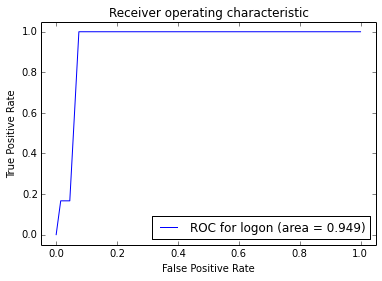

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, scoring)
AUC = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC for %s (area = %0.3f)' % ('logon', AUC))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()